In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Load clean data 
df = pd.read_csv("../data/processed/cleaned_transactions.csv")
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

In [3]:
# Extract date and hour
df['day_of_week'] = df['invoice_date'].dt.day_name()
df['hour'] = df['invoice_date'].dt.hour 

In [4]:
# Analyze best day
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']
daily_sales = df.groupby('day_of_week')['total_amount'].sum().reindex(days_order)
daily_sales


day_of_week
Monday       2817407.806
Tuesday      3384678.832
Wednesday    3115619.693
Thursday     3841082.962
Friday       2758423.493
Sunday       1816413.342
Name: total_amount, dtype: float64

In [5]:
# Analyze best hour
hourly_sales = df.groupby('hour')['total_amount'].sum()
hourly_sales

hour
6           4.250
7       76212.570
8      528877.660
9     1509659.881
10    2360784.823
11    2271810.993
12    2750224.631
13    2401116.924
14    1995849.271
15    1882943.792
16    1109616.461
17     495200.732
18     194533.670
19     126979.280
20      39614.240
Name: total_amount, dtype: float64

c:\Users\rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


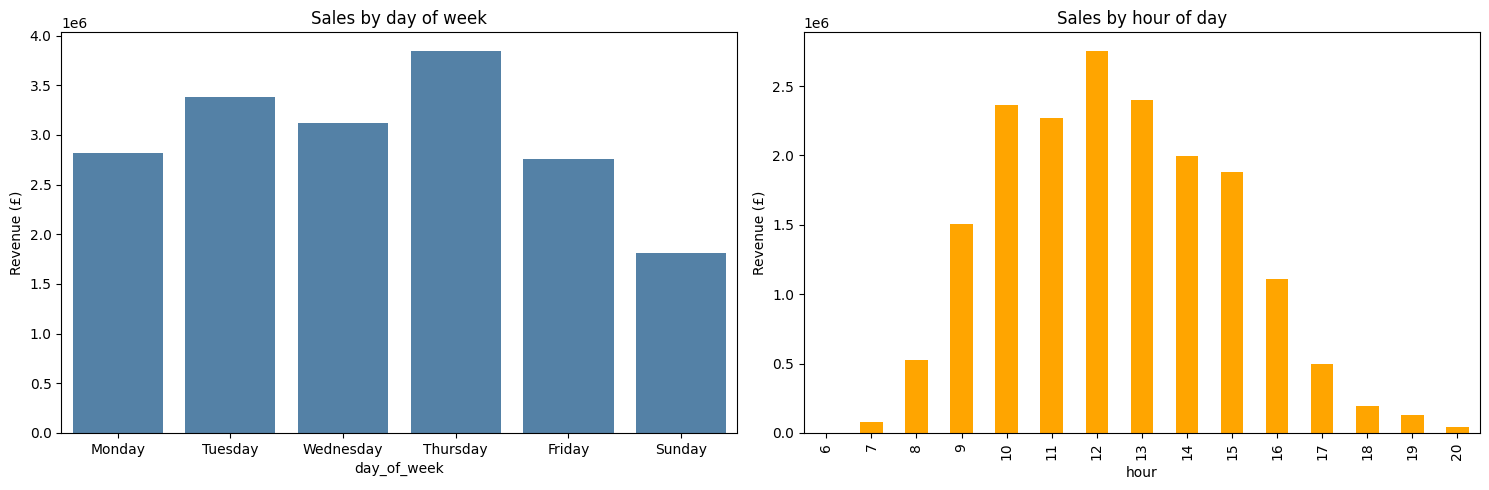

In [6]:
# Plot them 
fig, ax = plt.subplots(1,2,figsize=(15,5))
# Day chart
sns.barplot(x=daily_sales.index, y=daily_sales.values, ax=ax[0], color='steelblue')
ax[0].set_title('Sales by day of week')
ax[0].set_ylabel('Revenue (£)')

# Hour chart 
hourly_sales.plot(kind='bar', ax=ax[1], color='orange')
ax[1].set_title('Sales by hour of day')
ax[1].set_ylabel('Revenue (£)')

plt.tight_layout()
plt.show()